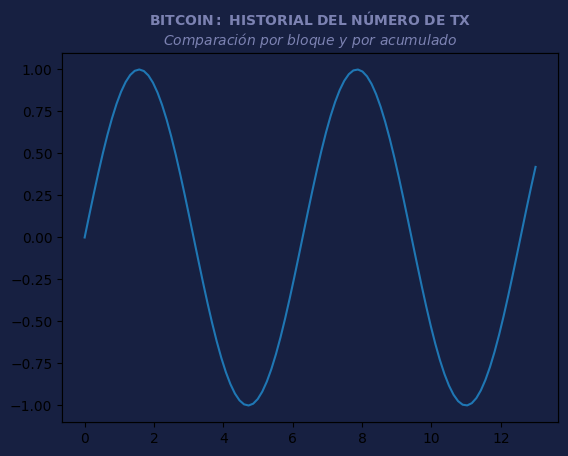

In [11]:
#librerias 


#usar comandos del sistema
import os
#manejo numerico
import numpy as np
#graficar
import matplotlib.pyplot as plt
#libreria manejo de tipografia
from matplotlib import font_manager as fm, rcParams

#cambiar la typografia
fpath = os.path.join(r'MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]



# Estilos: ESTAS VARIABLES CONTIENEN ESTILOS
estilo_dark=[(124/255., 130/255., 178/255.), (23/255., 32/255., 65/255.), (23/255., 32/255., 65/255.),] 
# BLANCO , AZUL OSCURO , AZULOSCURO
estilo_dark2=[(237/255., 237/255., 237/255.), (64/255., 64/255., 64/255.), (64/255., 64/255., 64/255.),] 
# BLANCO , NEGRO , NEGRO
estilo_dark3=[(253/255., 253/255., 253/255.), (44/255., 44/255., 44/255.), (254/255., 254/255., 244/255.),] 
# BLANCO , NEGRO , BLANCO
estilo_blanco=[(58/255., 53/255., 59/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),] 
# NEGRO, BLANCO , BLANCO
estilo_blanco2=[(80/255., 82/255., 81/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),]
# NEGRO , BLANCO, BLANCO


#Estilos=[estilo_dark,estilo_blanco]
Estilos=[estilo_dark,estilo_dark2,estilo_dark3,estilo_blanco,estilo_blanco2]

# se tienen variables que contienen los colores del formato
# estilo[0]= Titulos y letras 
# estilo[1] = Fondo principal
# estilo[2] = Fondo imagen




# colores: ESTA VARIABLE CONTIENE COLORES
colores = [(141, 211, 199),(254, 255, 179),(31, 119, 180),] 
#colores = [(206, 213, 231),(144, 177, 237),(191, 176, 205),(109,145,181),(103,133,185)] 
#amarillo, azul claro, azul fuerte,
for i in range(len(colores)):
    r, g, b = colores[i]
    colores[i] = (r / 255., g / 255., b / 255.)



fig, ax = plt.subplots()
########
ax = plt.gca()
#titulo
plt.title(r"$\bf{BITCOIN:\ HISTORIAL\ DEL\ NÚMERO\ DE\ TX}$" "\n" r"$\it{Comparación\ por\ bloque\ y\ por\ acumulado}$",fontsize=10,color=Estilos[0][0],fontproperties=prop)


#Color del fondo
fig.patch.set_facecolor(Estilos[0][1])

#fondo dentro la grafica
plt.axes().patch.set_facecolor(Estilos[0][2])

ax.set_yticks([],[],)
ax.set_xticks([],[],)
###cuadricula
#plt.grid(False, color=colores[2],axis= 'both')


#color: 
#colores de los números
# ax.tick_params(axis='x')
# ax.tick_params(axis='y', colors='gray')
t=np.linspace(0,13,100)
#xt = np.random.randn(100)
xt=np.sin(t)
plt.plot(t,xt,label="disperso",color=colores[2])

plt.show()
#plt.savefig('test.png')
#Las gráficas objetivo 
#1 historial tamaño de bloque
#2 historial numero de transacciones
#3 hash rate 
#4 llegada de bloques

In [ ]:
rgb = (0,0,0)

# trabajo sobre los tiempos


In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from datetime import datetime, timedelta

aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [15]:


#crea un arreglo que empieza en 1 sube hasta 798268, sube de 1 en 1 
#a=np.copy(time_b)
#c=np.linspace(1,len(time_b),len(time_b))

#copia el contenido del arreglo time_b
diferencias=[]

for i in range(1,len(time_b)):
    fecha_anterior=datetime.strptime(time_b[i-1], "%Y-%m-%d %H:%M:%S")
    fecha_actual = datetime.strptime(time_b[i], "%Y-%m-%d %H:%M:%S")
    diferencia = (fecha_actual - fecha_anterior).total_seconds()
    diferencias.append(diferencia)
#se debe optimizar este for para no llamar dos veces al strptime por cada iteración
print(len(diferencias))
    
#fig,ax=plt.subplots()
#crea un objeto graficable del tipo fig
#ax.scatter(c,diferencias)



798267


In [34]:
fechas=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in time_b]
#diferencias=[(fechas[i]-fechas(i-1)).total_seconds() for i in range(1,len(fechas)) ]


In [39]:
diferencias=[]
for i in range(1,len(fechas)):
    diferencias.append((fechas[i]-fechas[i-1]).total_seconds())
    
d=np.array(diferencias)
d=d/60

In [13]:
# np.where(d<0,d,0)
# for i in range(0,len(d)):
#    if d[i]<0:
#         print(d[i])
#         print(i)
#  #imprime todos los bloques donde sucede la ANOMALIA

# #print(np.mean(d))
# print(len(c))
# print(len(d))

798268
798271


In [ ]:
locator = mdates.MonthLocator(interval=50)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_tick_params(labelsize=10, rotation=15)
plt.tick_params(axis='x', colors='black')

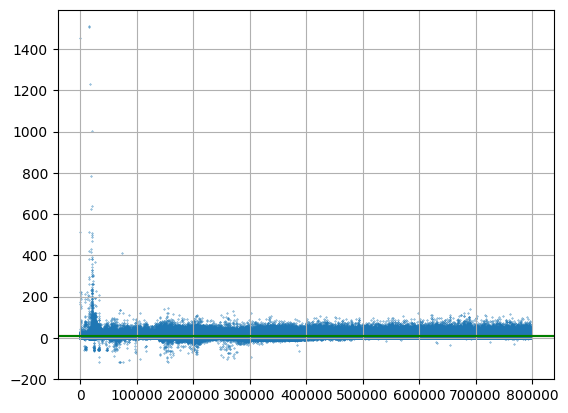

In [43]:

fig,ax=plt.subplots()
#crea un objeto graficable del tipo fig
ax.scatter(c[:len(d)], d, s=0.1)
plt.axhline(10, color='red')
plt.axhline(np.mean(d), color='g')
ax.grid(True)

#crea una grafica de sipersion y toma como eje x al arreglo "c", eje y a "b"
